<a href="https://colab.research.google.com/github/sakuragi-zero/yatteiki/blob/master/NLP/wordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **自然言語処理の世界にようこそ!!**  
今回は形態素解析の実行したのちにWordCloudを使って  
自分好みのPC壁紙を作っていきます

In [ ]:
!pip install -q mecab-python3==0.996.5

     |████████████████████████████████| 17.1 MB 421 kB/s 


インポートができたらメカブを使って形態素解析を行います

In [ ]:
import MeCab
mecab = MeCab.Tagger('-Ochasen')
data = mecab.parse('私は櫻木と申します！岩田組の会長です')
print(data)

私	ワタシ	私	名詞-代名詞-一般		
は	ハ	は	助詞-係助詞		
櫻木	サクラギ	櫻木	名詞-固有名詞-人名-姓		
と	ト	と	助詞-格助詞-引用		
申し	モウシ	申す	動詞-自立	五段・サ行	連用形
ます	マス	ます	助動詞	特殊・マス	基本形
！	！	！	記号-一般		
岩田	イワタ	岩田	名詞-固有名詞-人名-姓		
組	グミ	組	名詞-接尾-一般		
の	ノ	の	助詞-連体化		
会長	カイチョウ	会長	名詞-一般		
です	デス	です	助動詞	特殊・デス	基本形
EOS



ゴシック体のインストール  

In [ ]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (8,306 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155203 files and directories currently installed.)
Preparing 

**自作のコンテンツを作成する**  
文章をinputで読み込む

In [ ]:
contents_data = input()

どれくらいの値打ちがあるだろう? 僕が今生きているこの世界に すべてが無意味だって思える ちょっと疲れてんのかなぁ 手に入れたものと引き換えにして 切り捨てたいくつもの輝き いちいち憂いていれるほど 平和な世の中じゃないし 一体どんな理想を描いたらいい? どんな希望を抱き進んだらいい? 答えようもないその問いかけは 日常に葬られていく 君がいたらなんていうかなぁ 「暗い」　と茶化して笑うかなぁ その柔らかな笑顔に振れて 僕の憂鬱が吹き飛んだらいいのに 決して捕まえることの出来ない 花火のような光だとしたって 僕はこの手を伸ばしたい 誰も皆　悲しみを抱いている だけど素敵な明日を願っている 臆病風に吹かれて　波風がたった世界を どれだけ愛することができるだろう? 考えすぎで言葉に詰まる 自分の不器用さが嫌い でも妙に器用に立ち振る舞う自分は それ以上に嫌い 笑っていても 泣いて過ごしても平等に時は流れる 未来が僕を呼んでる その声は今　君にも聞こえていますか? さよならが迎えに来ることを 最初からわかっていたとしたって 何度でも君に逢いたい めぐり逢えたことでこんなに 世界が美しく見えるなんて 想像さえもしていない　単純だって笑うかい? 君に心からありがとうを言うよ 滞らないように　揺れて流れて 透き通ってく水のような 心であれたら 逢いたくなったときの分まで 寂しくなったときの分まで 君を強く焼き付けたい 誰も皆問題を抱えている だけど素敵な明日を願っている 臆病風に吹かれて　波風がたった世界を どれだけ愛することができるだろう?


In [ ]:
#contents_data = "".join(contents)

In [ ]:
import MeCab
from wordcloud import WordCloud
from collections import Counter

#MeCabで形態素解析
mecab = MeCab.Tagger('-Ochasen')
node = mecab.parseToNode(contents_data)
words = []

while node is not None:

    #品詞と品詞細分類１を抽出
    pos_type = node.feature.split(',')[0]
    subtype = node.feature.split(',')[1]

    #品詞が名詞、品詞細分類１が一般のとき
    if pos_type in ['名詞']:
        if subtype in ['一般']:
            words.append(node.surface)

    node = node.next

#出現回数を集計し、最頻順にソート
words_count = Counter(words)
result = words_count.most_common()#ここの文字列が使われる

#出現回数結果の画面出力
for word, cnt in result:
    print(word, cnt)

世界 4
手 2
臆病 2
波風 2
自分 2
値打ち 1
引き換え 1
輝き 1
世の中 1
理想 1
答え 1
日常 1
笑顔 1
憂鬱 1
花火 1
光 1
悲しみ 1
考え 1
言葉 1
時 1
未来 1
声 1
さよなら 1
最初 1
単純 1
水 1
心 1


最後にWord Cloudを用いて、前項で抽出した一般名詞とその出現回数のデータを利用し、画像を生成します。Word Cloudには辞書型でデータを取り込むため、初めに辞書型に変換します。その後、Word Cloudの背景やフォント、また画像サイズを設定します。フォントは以前インストールしたIPAゴシックのファイルパスを指定します。そして、画像を生成し画面に出力します。出力にはPythonの描画用ライブラリであるmatplotlibを使用します

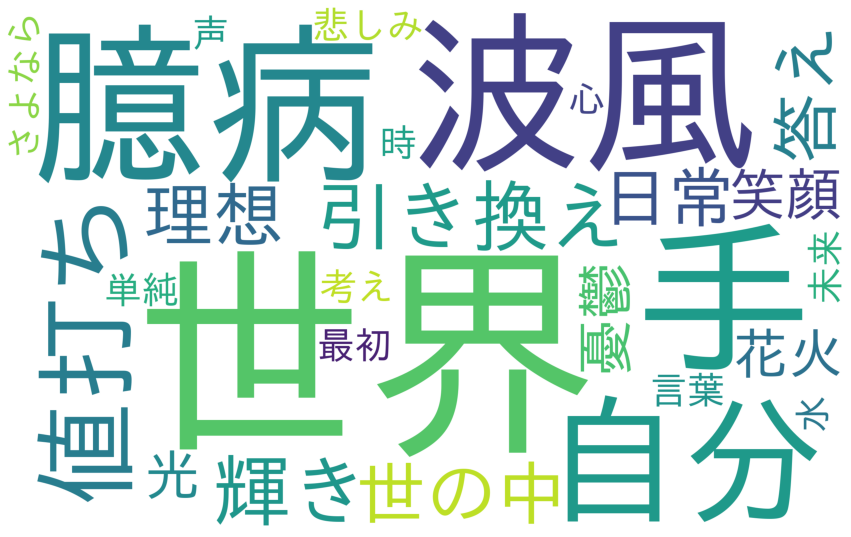

In [ ]:
#=======================#
########パラメータ設定#######
#wordcloud = WordCloud(background_color='blue',←背景の色を指定する
#color_func=lambda *args, **kwargs: (255,0,0),←これで文字の色を指定する(255階調)
#colormap="summer",←文字の色を指定した場合は無視される
#stopwords=["Yes"],←表示したくない文字を入れる※日本語は適応できない可能性がある
#font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',←使用するフォントを指定する
#=======================#

#wordcloud取込用に辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成
from wordcloud import WordCloud, STOPWORDS,  ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.add("Yes")

#パラメータ
wordcloud = WordCloud(background_color='white',
#background_color='black',
#color_func=lambda *args, **kwargs: (255,255,255),
#contour_color='steelblue',
#colormap="summer",
stopwords=stopwords,
font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
width=2560,
height=1600).fit_words(dic_result)

#生成した画像の表示
import matplotlib.pyplot as plt 
from matplotlib import rcParams

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#生成する画像のディレクトリーと名前を設定する
filename = "/content/image.jpeg"

**ファイルのエクスポート**

In [ ]:
wordcloud.to_file(filename)

https://amueller.github.io/word_cloud/references.html  
公式リファレンス

https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud  
関数一覧

**fit_words（頻度）**  
単語と頻度からword_cloudを作成します。  
**generate（文章）**  

テキストからwordcloudを生成します。  

**generate_from_frequencies（頻度[、…]）**  

単語と頻度からword_cloudを作成します。  

**generate_from_text（文章）**  

テキストからwordcloudを生成します。  

**process_text（文章）**  

長いテキストを単語に分割し、ストップワードを削除します。  

**recolor（[random_state、color_func、colormap]）**  

既存のレイアウトの色を変更します。  

**to_array（）**  

numpy配列に変換します。  

**to_file（ファイル名）**  

画像ファイルにエクスポートします。  

**to_svg（[embed_font、optimize_embedded_font、…]）**  

SVGにエクスポートします。  

**to_html**  

**to_image**  


記事はこちら↓  
\https://qiita.com/str32/items/4539e417a9cb333abd52

**上級者編**

# マスクの形状から作成  

In [ ]:
# from os import path
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# import os

# from wordcloud import WordCloud, STOPWORDS

# # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# # Read the whole text.
# text = open(path.join(d, 'alice.txt')).read()

# # read the mask image
# # taken from
# # http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
# #マスクを切った画像を用意
# alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

# stopwords = set(STOPWORDS)
# stopwords.add("said")

# wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
#                stopwords=stopwords, contour_width=3, contour_color='steelblue')

# # generate word cloud
# wc.generate(text)

# # store to file
# wc.to_file(path.join(d, "alice.png"))

# # show
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.figure()
# plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()

# エッジマップを使用して色分け

In [ ]:
# import os
# from PIL import Image

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.ndimage import gaussian_gradient_magnitude

# from wordcloud import WordCloud, ImageColorGenerator

# # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# # load wikipedia text on rainbow
# text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# # load image. This has been modified in gimp to be brighter and have more saturation.
# parrot_color = np.array(Image.open(os.path.join(d, "parrot-by-jose-mari-gimenez2.jpg")))
# # subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
# parrot_color = parrot_color[::3, ::3]

# # create mask  white is "masked out"
# parrot_mask = parrot_color.copy()
# parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# # some finesse: we enforce boundaries between colors so they get less washed out.
# # For that we do some edge detection in the image
# edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
# parrot_mask[edges > .08] = 255

# # create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# # relative_scaling=0 means the frequencies in the data are reflected less
# # acurately but it makes a better picture
# wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# # generate word cloud
# wc.generate(text)
# plt.imshow(wc)

# # create coloring from image
# image_colors = ImageColorGenerator(parrot_color)
# wc.recolor(color_func=image_colors)
# plt.figure(figsize=(10, 10))
# plt.imshow(wc, interpolation="bilinear")
# wc.to_file("parrot_new.png")

# plt.figure(figsize=(10, 10))
# plt.title("Original Image")
# plt.imshow(parrot_color)

# plt.figure(figsize=(10, 10))
# plt.title("Edge map")
# plt.imshow(edges)
# plt.show()